# Optical Character Recognition with Tesseract

Optical Character Recognition (OCR) is a technology that converts different types of documents, such as scanned paper documents, PDFs, or images captured by cameras, into editable and searchable text. OCR is used to digitize printed texts so that they can be electronically edited, searched, stored more compactly, displayed online, and used in machine processes such as cognitive computing, machine translation, and text-to-speech. Tesseract-OCR, an open-source OCR engine, is a key player in this field. It excels in recognizing text from images and scanned documents, supporting a wide range of languages. Tesseract’s ability to accurately convert complex images into textual data makes it a vital tool for automating data extraction, reducing manual data entry, and enabling efficient document processing.

**¿Working on the cloud or locally?**

In case you may prefer to use Google Colab you can access to a Colab adapted script [here](https://drive.google.com/drive/folders/14yPdrPUBHmmu9c9WGF8BLDcYc6sytyeQ?usp=sharing). Don't forget to log in with your PUCP account. Once logged, you may download the "Sessions_Copy" folder, unzip, and upload to your own Google Drive Unity. 

Otherwise, follow the instructions in Section 1. to work locally.

## 1. Tesseract-OCR installation process:

### Step 1. Install Tesseract OCR

1. Download the Tesseract executable from the [Tesseract at UB Mannheim repository](https://github.com/UB-Mannheim/tesseract/wiki).
2. Run the downloaded installer and follow the installation instructions.
3. During installation, it's recommended to use a standard installation path such as `C:\Program Files\Tesseract-OCR`. Otherwise, make note of the installation path, as it will be needed for configuring your software to use Tesseract.

### Step 2. Adding Spanish Language Support to Tesseract OCR

To use the Spanish language with Tesseract OCR, you need to download the `spa.traineddata` file and place it in the correct `tessdata` directory. Follow these steps to set it up:

1. Visit the [Tesseract OCR tessdata repository](https://github.com/tesseract-ocr/tessdata).
2. Find the `spa.traineddata` file in the list.
3. Download the file by clicking on it, then clicking the "Download" button.
4. Navigate to the `tessdata` directory within your Tesseract installation directory. If you installed Tesseract via an installer, it's likely in `C:\Program Files\Tesseract-OCR`.
5. Copy the downloaded `spa.traineddata` file into this `tessdata` directory.

### Step 3. Installing Poppler for Windows

Poppler is required for converting PDF pages into images. Follow these steps to install Poppler:

1.  Visit the [pdf2image repository](https://github.com/Belval/pdf2image?tab=readme-ov-file), which provides links to Poppler Windows binaries. Then, download the Poppler Windows binary [here](https://github.com/oschwartz10612/poppler-windows/releases/). The download is typically a `.zip` file.

2. After downloading, extract the `.zip` file to a location on your computer. For example, you might extract it to `C:\poppler`.

4. Navigate to the extracted Poppler folder (e.g., `C:\poppler`), and find the `bin` directory inside it. It might be `C:\poppler\Library\bin`
   - Copy the path to the `bin` directory.
   - Paste the path to your system's PATH environment variable. 
   - Follow the steps in this [guide to add to the PATH on Windows 10](https://www.architectryan.com/2018/03/17/add-to-the-path-on-windows-10/) to add the copied path to your system's PATH environment variable.
 
### How to access to your sistem's PATH enviroment?

1. Search for 'Advanced system settings in your explorer. Then, click on 'Environment Variables'
2. In 'System Variables', click 'New'. Add the path to the Poppler `bin` directory (example: `C:\poppler\Library\bin`)

In [1]:
# !pip install opencv-python
# !pip install pytesseract

In [1]:
from PIL import Image
from io import BytesIO
import pytesseract
# Specify the path where Tesseract-OCR was installed
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from pytesseract import Output
import re
import glob
import os
import PIL.Image
from PIL import Image
from pdf2image import convert_from_path

## 2. Custom configuration

#### Recognizing Only Digits
Focus OCR to recognize only digits.

```python
  custom_config = r'--oem 3 --psm 6 outputbase digits'
  text = pytesseract.image_to_string( image, config = custom_config )
```

In [2]:
custom_config = r'--oem 3 --psm 6 outputbase digits'
image         = '../data/Part_II/ocr/img/phone_numbers.png'
text          = pytesseract.image_to_string( image, config = custom_config )
print( text )

0115234345
444234356576
0203456879
0783345575
075123344
07987644
1334546454
481657643222
0744443343
01234543898
41513619873644



#### Using a Whitelist
Specify a set of characters for Pytesseract to recognize.
```python
custom_config = r'-c tessedit_char_whitelist=abcdefghijklmnopqrstuvwxyz'
text = pytesseract.image_to_string(image, config=custom_config)
```

In [4]:
custom_config = r'-c tessedit_char_whitelist=abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'
image         = '../data/Part_II/ocr/img/eeggll.jpg'
text          = pytesseract.image_to_string( image, config = custom_config )
print( text )

Actividadesparala a
Bienvenidade
CachimbosEEGGLL

Z

rd



#### Using a Blacklist
Specify a set of characters for Pytesseract to ignore.
```python
custom_config = r'-c tessedit_char_blacklist=abcdefghijklmnopqrstuvwxyz --psm 6'
text = pytesseract.image_to_string(image, config=custom_config)
```

In [6]:
custom_config = r'-c tessedit_char_blacklist=0123456789 --psm 6'
image         = '../data/Part_II/ocr/img/con_trabajo.png'
text          = pytesseract.image_to_string( image, config = custom_config )
print( text )

CEO * inc.usion

"Segun el Informe de

Evolucion de la Ley .

de la Fundacién ConTrabajo,

existe una brecha de ;
contratacion de casi O We
mil personas con r
discapacidad" n\



#### Using a Specifying Language
Set the language for Pytesseract.
```python
custom_config = r'-l eng'
text = pytesseract.image_to_string( image, config = custom_config )
```

Or alternatively

```python
text = pytesseract.image_to_string( image, lang = 'eng' )
```

In [9]:
image         = '../data/Part_II/ocr/img/comunicado.jpg'
text          = pytesseract.image_to_string( image, lang = 'spa' )
print( text )

UNIVERSIDAD NACIONAL MAYOR DE SAN MARCOS
Universidad del Perú. Decana de América

“Año del Fortalecimiento de la Soberanía Nacional"

COMUNICADO

La Universidad Nacional Mayor de San Marcos (UNMSM), a través del Vicerrectorado Académico de Pregrado, informa a la
comunidad universitaria sanmarquina que, por disposición de la Alta Dirección, las clases presenciales y semipresenciales
serán de manera virtual desde el 13 de diciembre del presente año.

El ingreso a la Ciudad Universitaria y demás sedes de la universidad estará restringido por medidas sanitaria y de
mantenimiento.

Lima, 12 de diciembre de 2022

Vicerrectorado Académico de Pregrado

'OGII. Av. Germán Amézaga 375, Edificio Jorge Basadre 301, sede central - Ciudad Universitaria. www.unmsm.edu.pe Teléfono: 619-7000 Anexos: 515 | email: sanmarcosaldiagunmsm.edu.pe



## 3. Identifying Patterns

Eventually, we would like to understand how text extraction is being performed and which elements are being included. Therefore, we can plot the text being identified from various confidence intervals to gain insights into this process.

In [18]:
def plot_detected_text( image_path, lang = 'eng', confidence_threshold = 60 ):
    """
    The function reads the image, applies OCR using Pytesseract to detect text, and then plots 
    the image with rectangles drawn around each detected text segment that meets the confidence 
    threshold.

    Input:
    - image_path (str)           : The path to the image file.
    - lang (str)                 : The language to be used by Tesseract OCR. Default is English ('eng').
                                   Posible values are 'eng', 'spa' and any other installed language.
    - confidence_threshold (int) : The confidence threshold for the OCR. Text with confidence 
                                   below this threshold will not be considered.
    """

    # Read the image
    img = cv2.imread( image_path )

    # Extract data using Pytesseract
    d = pytesseract.image_to_data( img, lang = lang, output_type = Output.DICT )

    # Draw rectangles around detected text
    n_boxes = len( d[ 'text' ] )
    for i in range( n_boxes ):
        if int( d[ 'conf' ][ i ]) > confidence_threshold:  # Check if confidence meets the threshold
            ( x, y, w, h ) = ( d[ 'left' ][ i ], d[ 'top' ][ i ], d[ 'width' ][ i ], d[ 'height' ][ i ] )
            img = cv2.rectangle( img, ( x, y ), ( x + w, y + h ), ( 0, 200, 0 ), 2 )

    # Plot the image
    plt.figure( figsize = ( 10, 8 ) )
    plt.imshow( cv2.cvtColor( img, cv2.COLOR_BGR2RGB ) )
    plt.axis( 'off' )
    plt.show()

Now, let's apply the ```plot_detected_text``` function

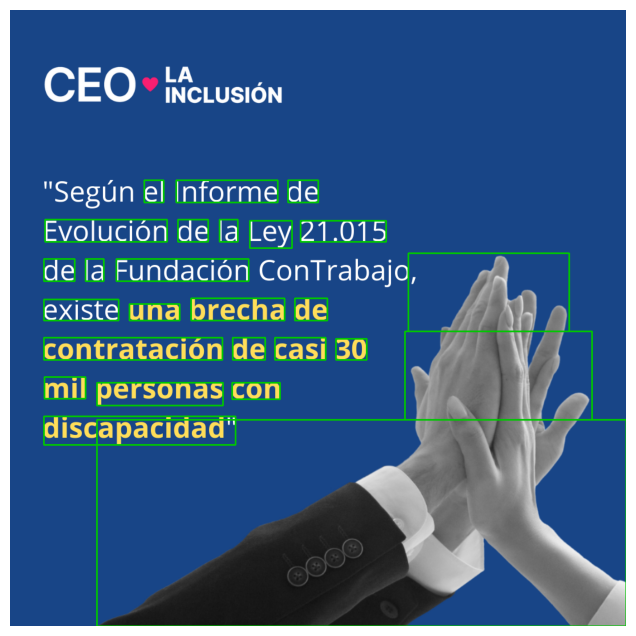

In [21]:
image_path = '../data/Part_II/ocr/img/con_trabajo.png'
lang       = 'spa'
confidence = 90

plot_detected_text( image_path, lang, confidence )

Now, we might be interested in identifying specific types of information using defined regex patterns. To achieve this, we can define the following function:

In [23]:
def find_pattern_in_image( img_path, pattern, lang= 'eng' ):
    
    """
    Searches for a specified regex pattern within the text extracted from an image using OCR.

    Input:
    - img_path (str) : Path to the image file to be processed.
    - pattern (str)  : Regex pattern to search for in the OCR results.
    - lang (str)     : Language code for OCR (default is English - 'eng').

    Output:
    - list           : A list of all matches found for the regex pattern 
                       in the image text.
    """

    
    img     = cv2.imread( img_path )
    results = pytesseract.image_to_string( img, lang = lang )

    # Search for the pattern in the OCR results
    findings = re.findall( pattern, results )

    return findings

In [24]:
pattern  = r'(?:[A-Za-z]+,?\s)?\d{1,2}\sde\s\w{4,}\s(?:de\s)?\d{4}' 
image    = '../data/Part_II/ocr/pron/Sobre el cambio de nombre del MIMP.jpg'
lang     = 'spa'
findings = find_pattern_in_image( image, pattern, lang = lang )
print( findings )

['8 de julio de 2022']


We can use the  function ```find_pattern_in_image``` to iterate over multiple files, storing the results in a two-column pandas dataframe. One column will contain the filename, and the other will list the found pattern(s). If a specific pattern is not found in a file, 'not found' will be displayed in the corresponding cell.

In [28]:
img_files = glob.glob( '../data/Part_II/ocr/pron/*.jpg' )
lang      = 'spa'
# pattern   = r'(?:[A-Za-z]+,?\s)?\d{1,2}\sde\s\w{4,}\s(?:de\s)?\d{4}'
pattern   = r'[A-Za-z]+,\s\d{1,2}\sde\s\w{4,}\sde\s\d{4}' 
# pattern   = r'\w{4,}'
results_list = []

for img in img_files:
    
    findings = find_pattern_in_image( img, pattern, lang = lang )
    filename = img.split( '\\' )[ -1 ].split( '.' )[ 0 ]
    
    if findings:
        
        for finding in findings:
            results_list.append( { 'Filename': filename, 'Findings': finding } )
            
    else:
        results_list.append( { 'Filename': filename, 'Finding': 'not found' } )

results_df = pd.DataFrame( results_list )

In [29]:
results_df.to_excel( '../data/Part_II/ocr/pron_extracted/findings.xlsx', index = 0 )

## 4. Applications to PDF files

"The Tesseract-OCR algorithm works exclusively with images. Therefore, to retrieve information, we proceed in two steps. 

- **First:** We convert the PDF files into images.
- **Second:** We apply the Tesseract-OCR algorithm to extract information and store it in .txt files.
- **Third:** We extract the information from the .txt files.

For this purpose, we first construct a function that allows us to convert PDF files into images, specifically converting the pages as specified.

In [31]:
def convert_pdf_to_images( pdf_path, export_path, page_ranges ):
    """
    Converts specified pages from a PDF file into images and saves them in a specified directory.

    Input:
    - pdf_path (str)    : Path to the PDF file.
    - page_ranges (str) : Pages to be converted. Can be a single page (e.g., '5'),
                          a range of pages (e.g., '5-10'), or multiple ranges 
                          (e.g., '5-10, 15-18'). Pages must be specified in an 
                          asceding numerical order. 
    - export_path (str) : Base directory path where the image folder will be created.

    Output:
    - Saves the extracted pages as images in a subfolder named after the PDF file 
      within the given export path. Each image is named according to its page number 
      (e.g., 'page_5.jpg').
    """

    # Create a directory for the output images
    base_name  = os.path.splitext( os.path.basename( pdf_path ) )[ 0 ]
    output_dir = os.path.join( export_path, base_name )
    if not os.path.exists( output_dir ):
        os.makedirs( output_dir )

    # Parse the page ranges
    pages_to_convert = []
    for part in page_ranges.split(','):
        if '-' in part:
            start, end = part.split( '-' )
            pages_to_convert.extend( range( int( start ), int( end ) + 1 ) )
        else:
            pages_to_convert.append( int( part ) )

    # Convert the specified pages
    images = convert_from_path( pdf_path, first_page = min( pages_to_convert ), last_page = max( pages_to_convert ) )
    
    # Save the images
    for i, page in enumerate( pages_to_convert, start = 1 ):
        if i <= len( images ):
            images[ i-1 ].save( os.path.join( output_dir, f'page_{page}.jpg' ), 'JPEG' )

We apply this function to the inform named 009-2018-2-2696-informe.pdf

In [32]:
input_path  = '../data/Part_II/ocr/reports/pdf/009-2018-2-2696-informe.pdf'
output_path = '../data/Part_II/ocr/reports/img'
page_ranges = '1, 15-19'

convert_pdf_to_images( input_path, output_path, page_ranges )

We can loop to apply this function over all the PDF files in a folder

In [33]:
input_files = glob.glob( '../data/Part_II/ocr/reports/pdf/*.pdf' )

for file in input_files:

    output_path = '../data/Part_II/ocr/reports/img'
    page_ranges = '1-10'
    convert_pdf_to_images( file, output_path, page_ranges )

Now, we construct a function that enables us to extract information from images and store it in text files.

In [34]:
def convert_images_to_text( input_path, export_path, lang = 'eng' ):
    """
    Converts images in a given folder to text files using pytesseract and saves them in a new subfolder 
    within the export directory. The subfolder is named after the last directory in the input path.

    Input:
    - input_path (str) :  Base folder path where the images are located. 
                          We assume that all files are valid image files
                          ( .jpg, .png or .jpeg )
    - export_path (str) : Base folder path where the text files will be saved.
    - lang (str)        : Language for pytesseract to use (default is English - 'eng').

    Output:
    - Creates a new subfolder in the export directory named after the last directory of the input path.
      For each image in the input folder, a corresponding text file is created in this subfolder.
    """

    # Get the last directory name from input_path
    last_dir_name = os.path.basename( os.path.normpath( input_path ) )

    # Create a new subdirectory in the export directory
    new_export_path = os.path.join( export_path, last_dir_name )
    if not os.path.exists( new_export_path ):
        os.makedirs( new_export_path )

    # Process each image in the input directory
    for filename in os.listdir( input_path ):
            
        # Read the image and extract text
        img_path = os.path.join( input_path, filename )
        img      = Image.open( img_path )
        text     = pytesseract.image_to_string( img, lang = lang )

        # Save the extracted text to a .txt file in the new subdirectory
        text_file_path = os.path.join( new_export_path, os.path.splitext( filename )[ 0 ] + '.txt' )
        with open( text_file_path, 'w', encoding = 'utf-8' ) as file:
            file.write( text )

We apply this function for all the pages extracted for inform 009-2018-2-2696-informe.

In [35]:
input_path  = '../data/Part_II/ocr/reports/img/009-2018-2-2696-informe'
output_path = '../data/Part_II/ocr/reports/txt'
lang        = 'spa'

convert_images_to_text( input_path, output_path, lang )

We can loop as well, so that we extract text for every page in every existing folder in the ```../data/Part_II/ocr/reports/img/``` path.

In [36]:
input_folders = glob.glob( '../data/Part_II/ocr/reports/img/*' )

for folder in input_folders:

    output_path = '../data/Part_II/ocr/reports/txt'
    lang        = 'spa'
    convert_images_to_text( folder, output_path, lang )

Now, we aim to extract the 'Origin' section from the reports, which, in all cases, is located on page 3. To accomplish this, we will use regex (regular expressions) and define two functions.

In [38]:
def find_origin_section( text, start_pattern, end_pattern ):
    """
    Extracts the origin section from the given text using start 
    and end regex patterns.
    """
    start_match = re.search( start_pattern, text )
    end_match   = re.search( end_pattern, text )
    if start_match and end_match:
        return text[ start_match.end() : end_match.start() ].strip()
        
    return None

def process_reports( base_path, start_pattern, end_pattern ):
    """
    Processes each report in the base_path to extract the origin section 
    and store in a DataFrame.
    """
    reports = []
    for folder in os.listdir( base_path ):
        folder_path = os.path.join( base_path, folder )
        
        if os.path.isdir( folder_path ):
            page_path = os.path.join( folder_path, 'page_3.txt ')
            
            if os.path.exists( page_path ):
                with open(page_path, 'r', encoding='utf-8') as file:
                    text = file.read()
                    origin_section = find_origin_section( text, start_pattern, end_pattern )
                    reports.append( { 'Report Name': folder, 'Origin Section': origin_section } )
    
    return pd.DataFrame( reports )

Finally we apply the last function

In [39]:
base_path     = '../data/Part_II/ocr/reports/txt'
start_pattern = r'ORIGEN'
end_pattern   = r'OBJETIVOS'
df            = process_reports( base_path, start_pattern, end_pattern )

In [40]:
df.to_excel( '../data/Part_II/ocr/reports/output/output.xlsx', index = False )